In [1]:
import numpy as np
import pylab as p
import matplotlib as mpl
import matplotlib.pyplot  as  plt
import matplotlib.cm as cm

import math
import itertools 

np.set_printoptions(linewidth = 130, precision = 13)
%matplotlib inline

from scipy.optimize import fsolve
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from matplotlib import colors
from matplotlib import pyplot

In [2]:
def fitness(del_nu,del_b): #gamma_ij = min{gamma_i, gamma_j}, k_{ij} = k
    mu = 1/(k*(R0 - 1))
    
    #lambda^2_1 + lambda^1_2
    lambd21 =  R0/2*(2*mu**2 + 3*mu + 2)/((mu + 1)**2)*del_nu + del_b
    lambd12 = -R0/2*(2*mu**2 +   mu    )/((mu + 1)**2)*del_nu - del_b
    
    return lambd21, lambd12

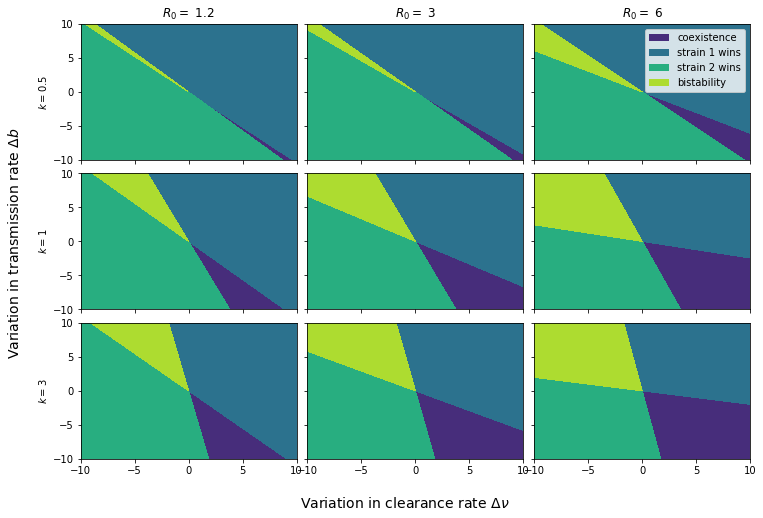

In [3]:
X = np.linspace(-10, 10, 2000)
Y = np.linspace(-10, 10, 2000)

x, y =  np.meshgrid(X, Y)

fig1, ax = plt.subplots(nrows = 3, ncols = 3, sharex='col', sharey='row', squeeze=False, gridspec_kw={'hspace': 0.1, 'wspace': 0.05}, figsize=(12,8))
((f11, f12, f13), (f21, f22, f23), (f31, f32, f33)) = ax

R0_arr = np.array([1.2, 3, 6])
k_arr  = np.array([0.5, 1, 3])

for i in range (0, 3):
    for j in range (0, 3):
        R0 = R0_arr[i]
        k = k_arr[j]
        
        L21, L12  = fitness(x, y)

        #matrix positive and negative for fitness of each strain
        pos1 = L21 > 0
        pos2 = L12 > 0
        neg1 = L21 < 0
        neg2 = L12 < 0

        #matrix of scenarios
        coex = (-10)*pos1*pos2
        s1 = -2*pos1*neg2
        s2 =  2*neg1*pos2
        bista =   10*neg1*neg2
        scen = coex + s1 + s2 + bista
        
        ax[i,j].contourf(x, y, scen, levels = [-10,-5, 0, 5,10])

proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in f33.collections]
f13.legend(proxy, ["coexistence", "strain 1 wins", "strain 2 wins", "bistability"])


cols = ['$R_0 =$ {}'.format(R) for R in (1.2, 3, 6)]
rows = ['$k =$ {}'.format(k) for k in (0.5, 1, 3) ]

for ax, col in zip(ax[0], cols):
    ax.set_title(col)
    
f11.set(ylabel = '$k = 0.5$')
f21.set(ylabel = '$k = 1$')
f31.set(ylabel = '$k = 3$')

fig1.text(0.5, 0.04, 'Variation in clearance rate $\Delta\\nu$', fontsize = 14, ha='center')
fig1.text(0.04, 0.5, 'Variation in transmission rate $\Delta b$', fontsize = 14, va='center', rotation='vertical')
fig1.savefig('3.4.1.jpg')